# GAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
(x_train, y_train) = load_safari(DATA_NAME)

In [4]:
x_train.shape

(80000, 28, 28, 1)

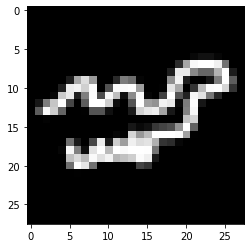

In [5]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## architecture

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [9]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

## training

In [10]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [11]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

C:\Users\Pol\Anaconda3\envs\GDL\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.716)(R 0.695, F 0.737)] [D acc: (0.203)(0.406, 0.000)] [G loss: 0.685] [G acc: 1.000]


C:\Users\Pol\Anaconda3\envs\GDL\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.689)(R 0.673, F 0.706)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.546] [G acc: 1.000]
2 [D loss: (4.816)(R 0.527, F 9.106)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.552] [G acc: 1.000]
3 [D loss: (0.623)(R 0.553, F 0.694)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.509] [G acc: 1.000]
4 [D loss: (0.612)(R 0.508, F 0.716)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.484] [G acc: 1.000]
5 [D loss: (0.608)(R 0.456, F 0.760)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.458] [G acc: 1.000]
6 [D loss: (0.611)(R 0.382, F 0.841)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.449] [G acc: 1.000]
7 [D loss: (0.614)(R 0.326, F 0.903)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.466] [G acc: 1.000]
8 [D loss: (0.597)(R 0.264, F 0.930)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.504] [G acc: 1.000]
9 [D loss: (0.555)(R 0.207, F 0.904)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.544] [G acc: 1.000]
10 [D loss: (0.501)(R 0.145, F 0.857)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.587] [G acc: 1.000]

85 [D loss: (0.688)(R 0.559, F 0.816)] [D acc: (0.602)(0.953, 0.250)] [G loss: 0.773] [G acc: 0.219]
86 [D loss: (0.669)(R 0.530, F 0.808)] [D acc: (0.578)(0.969, 0.188)] [G loss: 0.765] [G acc: 0.156]
87 [D loss: (0.669)(R 0.560, F 0.778)] [D acc: (0.578)(0.875, 0.281)] [G loss: 0.799] [G acc: 0.031]
88 [D loss: (0.658)(R 0.554, F 0.762)] [D acc: (0.555)(0.797, 0.312)] [G loss: 0.827] [G acc: 0.047]
89 [D loss: (0.675)(R 0.513, F 0.838)] [D acc: (0.516)(0.859, 0.172)] [G loss: 0.859] [G acc: 0.094]
90 [D loss: (0.610)(R 0.552, F 0.668)] [D acc: (0.625)(0.750, 0.500)] [G loss: 0.762] [G acc: 0.234]
91 [D loss: (0.668)(R 0.696, F 0.640)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.093] [G acc: 0.016]
92 [D loss: (0.752)(R 0.600, F 0.904)] [D acc: (0.438)(0.703, 0.172)] [G loss: 0.711] [G acc: 0.422]
93 [D loss: (0.625)(R 0.470, F 0.781)] [D acc: (0.578)(0.859, 0.297)] [G loss: 0.725] [G acc: 0.281]
94 [D loss: (0.610)(R 0.418, F 0.803)] [D acc: (0.602)(0.938, 0.266)] [G loss: 0.764] [G ac

165 [D loss: (0.662)(R 0.597, F 0.726)] [D acc: (0.602)(0.734, 0.469)] [G loss: 0.736] [G acc: 0.250]
166 [D loss: (0.724)(R 0.557, F 0.892)] [D acc: (0.555)(0.781, 0.328)] [G loss: 0.710] [G acc: 0.359]
167 [D loss: (0.687)(R 0.653, F 0.721)] [D acc: (0.531)(0.656, 0.406)] [G loss: 0.696] [G acc: 0.438]
168 [D loss: (0.700)(R 0.597, F 0.804)] [D acc: (0.516)(0.812, 0.219)] [G loss: 0.714] [G acc: 0.453]
169 [D loss: (0.718)(R 0.649, F 0.788)] [D acc: (0.414)(0.641, 0.188)] [G loss: 0.699] [G acc: 0.516]
170 [D loss: (0.712)(R 0.656, F 0.768)] [D acc: (0.406)(0.656, 0.156)] [G loss: 0.689] [G acc: 0.422]
171 [D loss: (0.686)(R 0.634, F 0.738)] [D acc: (0.578)(0.797, 0.359)] [G loss: 0.727] [G acc: 0.266]
172 [D loss: (0.708)(R 0.621, F 0.795)] [D acc: (0.539)(0.750, 0.328)] [G loss: 0.780] [G acc: 0.125]
173 [D loss: (0.658)(R 0.690, F 0.626)] [D acc: (0.578)(0.500, 0.656)] [G loss: 0.749] [G acc: 0.203]
174 [D loss: (0.735)(R 0.680, F 0.791)] [D acc: (0.430)(0.531, 0.328)] [G loss: 0.

246 [D loss: (0.647)(R 0.571, F 0.724)] [D acc: (0.586)(0.656, 0.516)] [G loss: 0.828] [G acc: 0.141]
247 [D loss: (0.675)(R 0.578, F 0.773)] [D acc: (0.641)(0.688, 0.594)] [G loss: 0.934] [G acc: 0.031]
248 [D loss: (0.684)(R 0.711, F 0.658)] [D acc: (0.516)(0.359, 0.672)] [G loss: 0.830] [G acc: 0.109]
249 [D loss: (0.631)(R 0.536, F 0.726)] [D acc: (0.641)(0.844, 0.438)] [G loss: 0.801] [G acc: 0.172]
250 [D loss: (0.636)(R 0.497, F 0.776)] [D acc: (0.688)(0.797, 0.578)] [G loss: 0.797] [G acc: 0.234]
251 [D loss: (0.658)(R 0.560, F 0.756)] [D acc: (0.586)(0.688, 0.484)] [G loss: 0.797] [G acc: 0.188]
252 [D loss: (0.755)(R 0.617, F 0.894)] [D acc: (0.508)(0.641, 0.375)] [G loss: 0.851] [G acc: 0.141]
253 [D loss: (0.674)(R 0.650, F 0.699)] [D acc: (0.602)(0.594, 0.609)] [G loss: 0.779] [G acc: 0.203]
254 [D loss: (0.660)(R 0.595, F 0.725)] [D acc: (0.625)(0.688, 0.562)] [G loss: 0.733] [G acc: 0.375]
255 [D loss: (0.684)(R 0.598, F 0.769)] [D acc: (0.547)(0.688, 0.406)] [G loss: 0.

330 [D loss: (0.652)(R 0.666, F 0.638)] [D acc: (0.648)(0.594, 0.703)] [G loss: 0.910] [G acc: 0.219]
331 [D loss: (0.713)(R 0.611, F 0.815)] [D acc: (0.555)(0.703, 0.406)] [G loss: 0.915] [G acc: 0.172]
332 [D loss: (0.640)(R 0.599, F 0.681)] [D acc: (0.625)(0.672, 0.578)] [G loss: 0.908] [G acc: 0.219]
333 [D loss: (0.660)(R 0.651, F 0.669)] [D acc: (0.625)(0.656, 0.594)] [G loss: 0.879] [G acc: 0.203]
334 [D loss: (0.680)(R 0.648, F 0.713)] [D acc: (0.516)(0.547, 0.484)] [G loss: 0.908] [G acc: 0.188]
335 [D loss: (0.654)(R 0.642, F 0.667)] [D acc: (0.625)(0.641, 0.609)] [G loss: 0.881] [G acc: 0.109]
336 [D loss: (0.630)(R 0.609, F 0.652)] [D acc: (0.672)(0.688, 0.656)] [G loss: 0.923] [G acc: 0.141]
337 [D loss: (0.637)(R 0.596, F 0.678)] [D acc: (0.633)(0.656, 0.609)] [G loss: 0.921] [G acc: 0.141]
338 [D loss: (0.650)(R 0.569, F 0.731)] [D acc: (0.602)(0.688, 0.516)] [G loss: 0.916] [G acc: 0.109]
339 [D loss: (0.661)(R 0.592, F 0.729)] [D acc: (0.633)(0.688, 0.578)] [G loss: 0.

410 [D loss: (0.636)(R 0.589, F 0.684)] [D acc: (0.680)(0.672, 0.688)] [G loss: 0.989] [G acc: 0.109]
411 [D loss: (0.652)(R 0.564, F 0.740)] [D acc: (0.586)(0.672, 0.500)] [G loss: 0.904] [G acc: 0.250]
412 [D loss: (0.606)(R 0.561, F 0.650)] [D acc: (0.695)(0.672, 0.719)] [G loss: 0.959] [G acc: 0.203]
413 [D loss: (0.624)(R 0.554, F 0.695)] [D acc: (0.672)(0.719, 0.625)] [G loss: 0.975] [G acc: 0.188]
414 [D loss: (0.634)(R 0.578, F 0.691)] [D acc: (0.664)(0.719, 0.609)] [G loss: 1.042] [G acc: 0.156]
415 [D loss: (0.646)(R 0.660, F 0.633)] [D acc: (0.617)(0.562, 0.672)] [G loss: 0.990] [G acc: 0.203]
416 [D loss: (0.692)(R 0.782, F 0.602)] [D acc: (0.562)(0.422, 0.703)] [G loss: 1.225] [G acc: 0.047]
417 [D loss: (0.666)(R 0.752, F 0.580)] [D acc: (0.625)(0.406, 0.844)] [G loss: 0.979] [G acc: 0.141]
418 [D loss: (0.645)(R 0.507, F 0.782)] [D acc: (0.633)(0.750, 0.516)] [G loss: 0.972] [G acc: 0.078]
419 [D loss: (0.676)(R 0.629, F 0.723)] [D acc: (0.578)(0.578, 0.578)] [G loss: 0.

491 [D loss: (0.606)(R 0.591, F 0.622)] [D acc: (0.695)(0.703, 0.688)] [G loss: 0.919] [G acc: 0.172]
492 [D loss: (0.659)(R 0.607, F 0.711)] [D acc: (0.586)(0.641, 0.531)] [G loss: 1.025] [G acc: 0.125]
493 [D loss: (0.679)(R 0.643, F 0.714)] [D acc: (0.633)(0.656, 0.609)] [G loss: 0.885] [G acc: 0.219]
494 [D loss: (0.652)(R 0.618, F 0.686)] [D acc: (0.602)(0.594, 0.609)] [G loss: 0.925] [G acc: 0.188]
495 [D loss: (0.624)(R 0.586, F 0.661)] [D acc: (0.641)(0.641, 0.641)] [G loss: 0.974] [G acc: 0.109]
496 [D loss: (0.646)(R 0.647, F 0.645)] [D acc: (0.656)(0.609, 0.703)] [G loss: 0.974] [G acc: 0.188]
497 [D loss: (0.683)(R 0.715, F 0.651)] [D acc: (0.641)(0.547, 0.734)] [G loss: 0.941] [G acc: 0.094]
498 [D loss: (0.627)(R 0.552, F 0.701)] [D acc: (0.672)(0.750, 0.594)] [G loss: 0.964] [G acc: 0.156]
499 [D loss: (0.622)(R 0.581, F 0.663)] [D acc: (0.609)(0.578, 0.641)] [G loss: 0.982] [G acc: 0.094]
500 [D loss: (0.639)(R 0.593, F 0.685)] [D acc: (0.672)(0.672, 0.672)] [G loss: 0.

575 [D loss: (0.601)(R 0.569, F 0.634)] [D acc: (0.680)(0.672, 0.688)] [G loss: 1.114] [G acc: 0.141]
576 [D loss: (0.641)(R 0.586, F 0.695)] [D acc: (0.594)(0.641, 0.547)] [G loss: 1.164] [G acc: 0.094]
577 [D loss: (0.583)(R 0.616, F 0.550)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.110] [G acc: 0.188]
578 [D loss: (0.659)(R 0.557, F 0.761)] [D acc: (0.594)(0.656, 0.531)] [G loss: 1.121] [G acc: 0.156]
579 [D loss: (0.628)(R 0.596, F 0.661)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.082] [G acc: 0.125]
580 [D loss: (0.655)(R 0.638, F 0.673)] [D acc: (0.570)(0.562, 0.578)] [G loss: 1.008] [G acc: 0.156]
581 [D loss: (0.568)(R 0.573, F 0.564)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.211] [G acc: 0.156]
582 [D loss: (0.615)(R 0.617, F 0.613)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.065] [G acc: 0.141]
583 [D loss: (0.579)(R 0.612, F 0.546)] [D acc: (0.680)(0.594, 0.766)] [G loss: 0.987] [G acc: 0.234]
584 [D loss: (0.600)(R 0.534, F 0.665)] [D acc: (0.656)(0.703, 0.609)] [G loss: 1.

655 [D loss: (0.598)(R 0.607, F 0.590)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.009] [G acc: 0.156]
656 [D loss: (0.626)(R 0.565, F 0.687)] [D acc: (0.648)(0.641, 0.656)] [G loss: 1.154] [G acc: 0.047]
657 [D loss: (0.641)(R 0.655, F 0.627)] [D acc: (0.664)(0.609, 0.719)] [G loss: 0.978] [G acc: 0.141]
658 [D loss: (0.622)(R 0.667, F 0.577)] [D acc: (0.664)(0.516, 0.812)] [G loss: 1.003] [G acc: 0.109]
659 [D loss: (0.592)(R 0.592, F 0.593)] [D acc: (0.641)(0.562, 0.719)] [G loss: 1.019] [G acc: 0.141]
660 [D loss: (0.624)(R 0.518, F 0.730)] [D acc: (0.641)(0.719, 0.562)] [G loss: 1.368] [G acc: 0.062]
661 [D loss: (0.606)(R 0.675, F 0.537)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.089] [G acc: 0.125]
662 [D loss: (0.650)(R 0.531, F 0.769)] [D acc: (0.672)(0.734, 0.609)] [G loss: 1.043] [G acc: 0.188]
663 [D loss: (0.522)(R 0.487, F 0.556)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.172] [G acc: 0.141]
664 [D loss: (0.724)(R 0.750, F 0.698)] [D acc: (0.555)(0.500, 0.609)] [G loss: 1.

KeyboardInterrupt: 

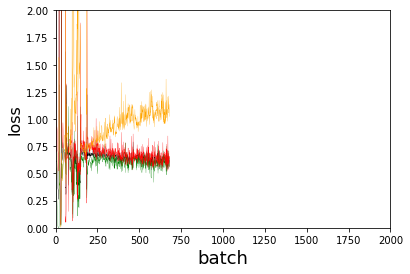

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


In [ ]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

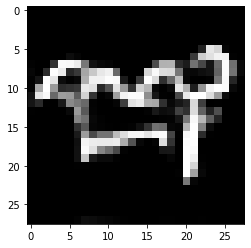

In [19]:
import numpy as np
noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
gen_imgs = gan.generator.predict(noise)
plt.imshow(gen_imgs[25,:,:,0], cmap = 'gray')

In [20]:
gen_imgs[10]

array([[[-0.9999546 ],
        [-0.9999995 ],
        [-1.        ],
        [-0.99999994],
        [-1.        ],
        [-0.99999994],
        [-0.9999995 ],
        [-0.9999991 ],
        [-0.9999823 ],
        [-0.9999635 ],
        [-0.9999569 ],
        [-0.9999533 ],
        [-0.99992406],
        [-0.9997191 ],
        [-0.99870497],
        [-0.99851483],
        [-0.9987713 ],
        [-0.9975936 ],
        [-0.99406886],
        [-0.9785458 ],
        [-0.9767582 ],
        [-0.97117835],
        [-0.97850025],
        [-0.995894  ],
        [-0.9977897 ],
        [-0.9996959 ],
        [-0.99988157],
        [-0.99528575]],

       [[-0.9999997 ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99999994],
        [-0.9999996 ],
        [-0.9999983 ],
        [